In [1]:
import pandas as pd
import numpy as np

#Imports to enable visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Python standard libraries
import glob, os    
import datetime

/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
#Functions

def read_df_from_csv_folder(folderpath,filename_pattern):
    result = pd.DataFrame()
    files_to_be_read = glob.glob(os.path.join(folderpath, filename_pattern))
    for i in xrange(len(files_to_be_read)):
        try:
            df = pd.read_csv(files_to_be_read[i])
            result = result.append(df)
        except Exception as e:
            pass
    return result


### Read Data

In [3]:
#base_folderpath = '/local/tarciso/masters/experiments/preliminary-exp/preliminary-exp-sample-data/buste-v3a/'
#base_folderpath = '/home/tarciso/workspace/trips-optimality-exp/data/'
base_folderpath = '/local/tarciso/data/'

#### Trips Improvement Capacity Data

In [4]:
#imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')
imp_cap_df = read_df_from_csv_folder(base_folderpath + '/duration_improvement_capacity/', 'part-*.csv')

In [5]:
imp_cap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24911 entries, 0 to 25
Data columns (total 7 columns):
date                 24911 non-null object
user_trip_id         24911 non-null int64
itinerary_id         24911 non-null int64
duration             24911 non-null float64
o_datetime           24911 non-null object
executed_duration    24911 non-null float64
imp_capacity         24911 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667
1,2017-06-20,420906795115,0,0.533333,2017-06-20 07:58:13,0.533333,0.000000
2,2017-06-20,498216206495,0,1.750000,2017-06-20 18:22:45,1.750000,0.000000
3,2017-06-20,721554505827,3,8.650000,2017-06-20 12:02:59,61.183333,52.533333
4,2017-06-20,747324309522,1,12.450000,2017-06-20 07:45:40,81.866667,69.416667


In [7]:
imp_cap_df.count()

date                 24911
user_trip_id         24911
itinerary_id         24911
duration             24911
o_datetime           24911
executed_duration    24911
imp_capacity         24911
dtype: int64

#### Trips Itinerary Data

In [8]:
#trips_itineraries = read_df_from_csv_folder(base_folderpath + '/trips_actual_itineraries/','part-*.csv')

In [9]:
#trips_itineraries.columns

In [10]:
#trips_itineraries.describe()

In [11]:
#trips_itineraries.head(10)

### Preparing Data

#### Computing Improvement Capacity as a Percentage to avoid value magnitude bias

In [41]:
imp_cap_df['imp_capacity_perc'] = imp_cap_df['imp_capacity'] / imp_cap_df['executed_duration']

In [42]:
imp_cap_df.head(10)

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,imp_capacity_perc,hour_of_day,period_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,0.988339,6,early_morning
1,2017-06-20,1365799600296,0,8.133333,2017-06-20 06:39:08,8.133333,0.000000,0.000000,6,early_morning
2,2017-06-20,1597727834226,3,10.083333,2017-06-20 06:53:59,807.100000,797.016667,0.987507,6,early_morning
3,2017-06-21,60129542284,3,10.250000,2017-06-21 06:41:49,39.166667,28.916667,0.738298,6,early_morning
4,2017-06-21,60129542292,2,29.350000,2017-06-21 06:47:10,467.050000,437.700000,0.937159,6,early_morning
5,2017-06-21,1271310319770,2,16.366667,2017-06-21 06:06:11,432.400000,416.033333,0.962149,6,early_morning
6,2017-06-21,1632087572505,0,1.250000,2017-06-21 06:15:08,1.250000,0.000000,0.000000,6,early_morning
7,2017-06-19,25769803855,0,379.066667,2017-06-19 06:36:33,379.066667,0.000000,0.000000,6,early_morning
8,2017-06-19,558345748595,3,13.883333,2017-06-19 06:40:06,171.683333,157.800000,0.919134,6,early_morning
9,2017-06-19,670014898285,2,16.283333,2017-06-19 06:48:29,100.400000,84.116667,0.837815,6,early_morning


#### Computing hour of day and period of day for each trip

In [37]:
imp_cap_df['hour_of_day'] = pd.to_datetime(imp_cap_df['o_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [40]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

imp_cap_df = imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,imp_capacity_perc,hour_of_day,period_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,0.988339,6,early_morning
1,2017-06-20,1365799600296,0,8.133333,2017-06-20 06:39:08,8.133333,0.000000,0.000000,6,early_morning
2,2017-06-20,1597727834226,3,10.083333,2017-06-20 06:53:59,807.100000,797.016667,0.987507,6,early_morning
3,2017-06-21,60129542284,3,10.250000,2017-06-21 06:41:49,39.166667,28.916667,0.738298,6,early_morning
4,2017-06-21,60129542292,2,29.350000,2017-06-21 06:47:10,467.050000,437.700000,0.937159,6,early_morning


#### Computing hour of day and period of day for each trip

In [64]:
def get_trip_len_bucket(trip_duration):
    if (trip_duration < 15):
        return '0_15'
    elif (trip_duration < 30):
        return '15_30'
    elif (trip_duration < 45):
        return '30_45'
    else:
        return '45+'


imp_cap_df['trip_length_bucket'] = imp_cap_df['executed_duration'].apply(get_trip_len_bucket)

In [65]:
imp_cap_df.head(10)

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,imp_capacity_perc,hour_of_day,period_of_day,trip_length_bucket
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,0.988339,6,early_morning,45+
1,2017-06-20,1365799600296,0,8.133333,2017-06-20 06:39:08,8.133333,0.000000,0.000000,6,early_morning,0_15
2,2017-06-20,1597727834226,3,10.083333,2017-06-20 06:53:59,807.100000,797.016667,0.987507,6,early_morning,45+
3,2017-06-21,60129542284,3,10.250000,2017-06-21 06:41:49,39.166667,28.916667,0.738298,6,early_morning,30_45
4,2017-06-21,60129542292,2,29.350000,2017-06-21 06:47:10,467.050000,437.700000,0.937159,6,early_morning,45+
5,2017-06-21,1271310319770,2,16.366667,2017-06-21 06:06:11,432.400000,416.033333,0.962149,6,early_morning,45+
6,2017-06-21,1632087572505,0,1.250000,2017-06-21 06:15:08,1.250000,0.000000,0.000000,6,early_morning,0_15
7,2017-06-19,25769803855,0,379.066667,2017-06-19 06:36:33,379.066667,0.000000,0.000000,6,early_morning,45+
8,2017-06-19,558345748595,3,13.883333,2017-06-19 06:40:06,171.683333,157.800000,0.919134,6,early_morning,45+
9,2017-06-19,670014898285,2,16.283333,2017-06-19 06:48:29,100.400000,84.116667,0.837815,6,early_morning,45+


### Analyzing Data Distribution

### Improvement Capacity Percentage

#### Overall

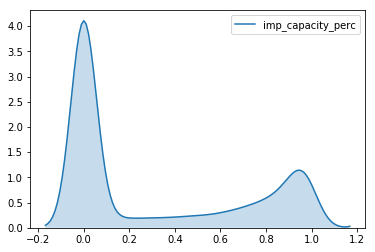

In [66]:
sns.kdeplot(imp_cap_df.imp_capacity_perc, shade=True)

In [67]:
imp_cap_df.imp_capacity_perc.describe()

count    24911.000000
mean         0.309995
std          0.398897
min          0.000000
25%          0.000000
50%          0.000000
75%          0.757761
max          0.999684
Name: imp_capacity_perc, dtype: float64

#### Removing outliers (lower/higher 5%)

In [68]:
fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity_perc,95)

print fith_perc, ninety_fith_perc

0.0 0.976874414782


In [69]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity_perc > fith_perc) & (imp_cap_df.imp_capacity_perc < ninety_fith_perc)].copy()

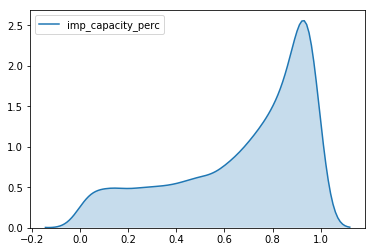

In [70]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity_perc, shade=True)

In [71]:
filtered_imp_cap_df.imp_capacity_perc.describe()

count    9.620000e+03
mean     6.748023e-01
std      2.813417e-01
min      1.268826e-16
25%      4.862881e-01
50%      7.729671e-01
75%      9.144210e-01
max      9.768719e-01
Name: imp_capacity_perc, dtype: float64

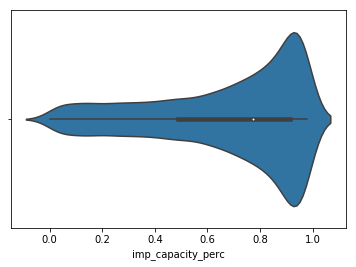

In [72]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity_perc)

#### Per trip length 

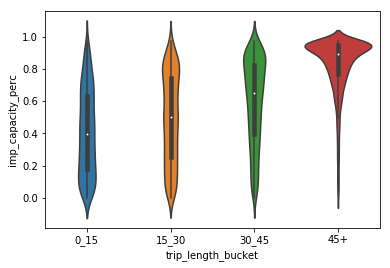

In [73]:
trip_len_order=['0_15','15_30','30_45','45+']
sns.violinplot(x='trip_length_bucket',y='imp_capacity_perc', data=filtered_imp_cap_df, order=trip_len_order)

#### Per hour of day

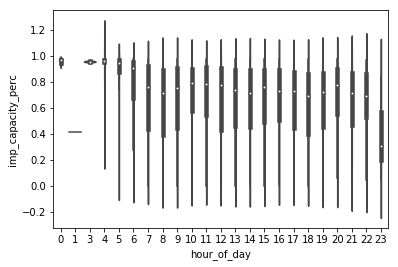

In [84]:
sns.violinplot(x='hour_of_day',y='imp_capacity_perc', data=filtered_imp_cap_df)

#### Per period of day

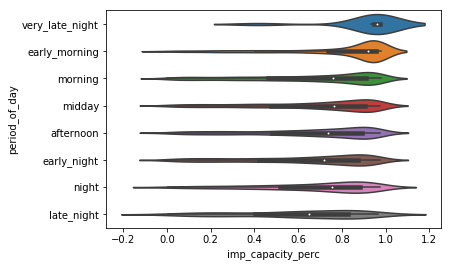

In [83]:
period_of_day_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.violinplot(x='imp_capacity_perc',y='period_of_day', data=filtered_imp_cap_df, order=period_of_day_order)

#### Per trip length and Period of Day

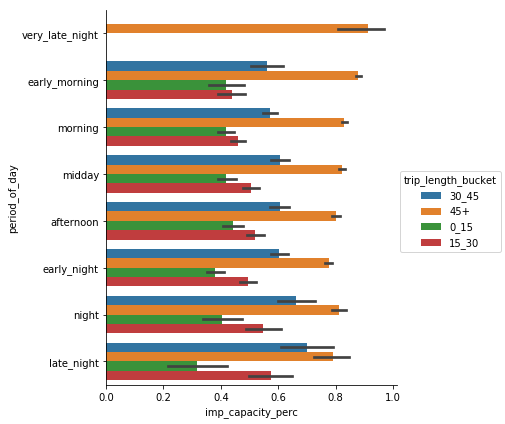

In [97]:
sns.factorplot(x='imp_capacity_perc',y='period_of_day',hue='trip_length_bucket', data=filtered_imp_cap_df, kind='bar', size=6, order=col_order)

### Raw Improvement Capacity

#### Overall

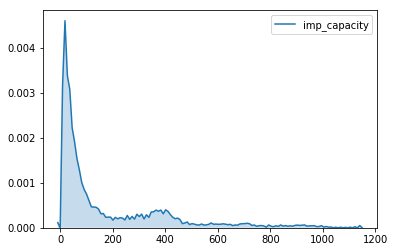

In [12]:
sns.kdeplot(imp_cap_df.imp_capacity, shade=True)

In [13]:
imp_cap_df.imp_capacity.describe()

count    24911.000000
mean        61.529759
std        153.104315
min          0.000000
25%          0.000000
50%          0.000000
75%         32.600000
max       1139.816667
Name: imp_capacity, dtype: float64

#### Removing outliers (lower/higher 5%)

In [14]:
fith_perc = np.percentile(imp_cap_df.imp_capacity,5)
ninety_fith_perc = np.percentile(imp_cap_df.imp_capacity,95)

print fith_perc, ninety_fith_perc

0.0 400.841666667


In [15]:
filtered_imp_cap_df = imp_cap_df[(imp_cap_df.imp_capacity > fith_perc) & (imp_cap_df.imp_capacity < ninety_fith_perc)].copy()

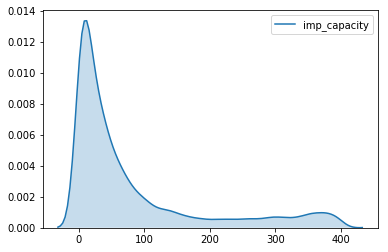

In [16]:
sns.kdeplot(filtered_imp_cap_df.imp_capacity, shade=True)

In [17]:
filtered_imp_cap_df.imp_capacity.describe()

count    9.620000e+03
mean     7.989378e+01
std      1.051678e+02
min      2.220446e-16
25%      1.051250e+01
50%      3.480833e+01
75%      9.509167e+01
max      4.008333e+02
Name: imp_capacity, dtype: float64

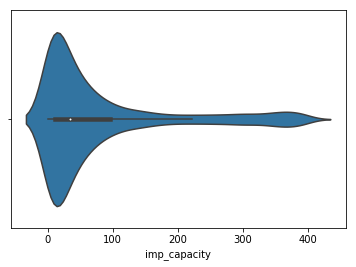

In [18]:
sns.violinplot(x=filtered_imp_cap_df.imp_capacity)

#### Per Hour of Day

In [19]:
filtered_imp_cap_df['hour_of_day'] = pd.to_datetime(filtered_imp_cap_df['o_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour

In [20]:
filtered_imp_cap_df.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,6
3,2017-06-20,721554505827,3,8.650000,2017-06-20 12:02:59,61.183333,52.533333,12
4,2017-06-20,747324309522,1,12.450000,2017-06-20 07:45:40,81.866667,69.416667,7
7,2017-06-20,1219770712204,1,12.200000,2017-06-20 17:20:58,157.116667,144.916667,17
8,2017-06-20,1288490188874,2,8.633333,2017-06-20 07:26:59,12.783333,4.150000,7


In [21]:
period_of_day_list = [('hour_of_day', [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]),
         ('period_of_day', ['very_late_night','very_late_night','very_late_night','very_late_night','early_morning','early_morning','early_morning','morning','morning','morning','morning','midday','midday','midday','afternoon','afternoon','afternoon','early_night','early_night','early_night','night','night','late_night','late_night'])]
period_of_day_df = pd.DataFrame.from_items(period_of_day_list)
period_of_day_df.period_of_day = period_of_day_df.period_of_day.astype('category', ordered=True)

period_of_day_df

,hour_of_day,period_of_day
0,0,very_late_night
1,1,very_late_night
2,2,very_late_night
3,3,very_late_night
4,4,early_morning
5,5,early_morning
6,6,early_morning
7,7,morning
8,8,morning
9,9,morning


In [22]:
imp_period_of_day = filtered_imp_cap_df.merge(period_of_day_df, how='inner', on='hour_of_day')

In [23]:
imp_period_of_day.head()

,date,user_trip_id,itinerary_id,duration,o_datetime,executed_duration,imp_capacity,hour_of_day,period_of_day
0,2017-06-20,120259084452,1,3.866667,2017-06-20 06:18:00,331.583333,327.716667,6,early_morning
1,2017-06-21,60129542284,3,10.250000,2017-06-21 06:41:49,39.166667,28.916667,6,early_morning
2,2017-06-19,558345748595,3,13.883333,2017-06-19 06:40:06,171.683333,157.800000,6,early_morning
3,2017-06-19,670014898285,2,16.283333,2017-06-19 06:48:29,100.400000,84.116667,6,early_morning
4,2017-06-19,738734374929,2,23.300000,2017-06-19 06:02:14,55.583333,32.283333,6,early_morning


/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1843: RuntimeWarning: invalid value encountered in double_scalars
  loval = q1 - whis * stats['iqr']
/home/tarciso/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:1844: RuntimeWarning: invalid value encountered in double_scalars
  hival = q3 + whis * stats['iqr']


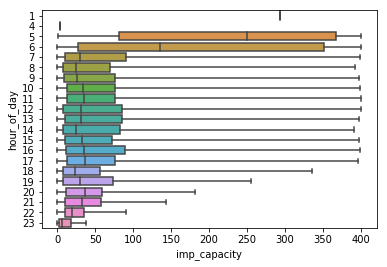

In [24]:
sns.boxplot(x=filtered_imp_cap_df.imp_capacity, y=filtered_imp_cap_df.hour_of_day, data=filtered_imp_cap_df, 
            whis=np.inf, orient='h')

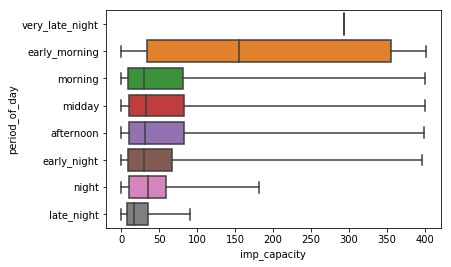

In [25]:
col_order = ['very_late_night','early_morning','morning','midday','afternoon','early_night','night','late_night']
sns.boxplot(x=imp_period_of_day.imp_capacity, y=imp_period_of_day.period_of_day, data=imp_period_of_day,
            order=col_order,whis=np.inf)

#### Per Day of Week (Sun-Sat)

#### Per Day Type (Mon,Fri,Tue-Thu,Sat-Sun)